# Project Report 
### Impact of Bike Sharing On Number of Vehicles Registered In Munich

#### The question that interests us is:
With the introduction of bike sharing, will there be any impact on number of vehicles purchased/registered each year in Munich?

## 1. Introduction 

This project aims to analyze the relationship between Bike Sharing and Vehicle Registrations in Munich. In recent years, bike sharing has become an increasingly popular mode of transportation in many cities around the world, including Munich. One potential benefit of bike sharing is that it can help reduce the number of cars on the road, which in turn can have a positive impact on traffic congestion, air pollution, and other factors. In this project, I will analyze the relationship between bike sharing and vehicle registrations in Munich to determine whether bike sharing has had an impact on the number of cars on the road.

## 2. Data Source 


###  Datasource1:
* Metadata URL:https://mobilithek.info/offers/-1738218276875079533
* Data URL: https://opendata.stadt-muenster.de/sites/default/files/Fahrzeugbestand-Regierungsbezirk-Muenster-2018-2022.xlsx
* Data Type: XLSX
#### Short description.
The Excel file contains information on the number of vehicles in the administrative district of Münster in the years 2018-2022. However, the data contains the registration details of all kinds of vehicles which we are ignoring for the sake of simplicity.  

### Datasource2:
* Metadata URL:https://www.kaggle.com/datasets/lucafrance/bike-traffic-in-munich?resource=download
* Data URL: https://www.kaggle.com/datasets/lucafrance/bike-traffic-in-munich/download?datasetVersionNumber=7
* Data Type: XLSX
#### Short description.
The city of Munich built six stations to measure bike traffic and weather conditions at different locations. The data is provided monthly as follows:

* traffic data for each station in 15 minutes intervals,
* daily weather and traffic data for each station,
* list of measuring stations with coordinates.


This dataset provides all available data consolidated starting from the first month available (January 2017).
However, from all the data my analysis is confied only to total amount of time people use a bike sharing service in a year. 


## 3. Install dependencies
Following dependecies were installed as a requirement of the project. 

In [1]:
%pip install pandas
%pip install plotly
%pip install 'SQLAlchemy==1.4.46'
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: "'SQLAlchemy==1.4.46'"


Note: you may need to restart the kernel to use updated packages.


## 4. Load data
Pandas dataframe was created using the local sqlite file.

In [194]:
import pandas as pd

mvr_df = pd.read_sql_table('MVR_DATA', 'sqlite:///mb.sqlite')
bike_df = pd.read_sql_table('BS_DATA', 'sqlite:///mb.sqlite')

## 5. Exploratory Data Analysis

### 5.1 Overview of the data

Firstly, to compare the data of two data sets namely "Munich Vehicle Registration Data" and "Munich Bike Sharing Data" data was transformed into a shape in which two data sets can be compared with each other. The resulting data sets has the following attributes. 

In [195]:
# Display the shape of the DataFrame
print("Number of rows in Vehicle Registration Data:", mvr_df.shape[0])
print("Number of rows in Bike Sharing Data:", bike_df.shape[0])
print("Number of columns in Vehicle Registration Data:", mvr_df.shape[1])
print("Number of columns in Bike Sharing Data:", bike_df.shape[1])

Number of rows in Vehicle Registration Data: 45
Number of rows in Bike Sharing Data: 7452
Number of columns in Vehicle Registration Data: 20
Number of columns in Bike Sharing Data: 7


### 5.2 Feature Engineering
The resulting data sets after performing cleaning and transformation in the above step still needs to be transformed in a form to extract meaningful information.  

#### 5.2.1. Calculation of Number of Vehicle Registered in each year 
It was not possible to calculate the total number of vehicles registered in each year in Munich due to the form of existing data. So following process was being done to calculate the total number of vehicle registered in Munich during the year 2018 - 2020 as the Munich Bike sharing data set contains only the aforementioned years data. 

In [196]:
#Calculation of number of Vehicles Registered
mvr_df=mvr_df[mvr_df["Statistical code and registration district"]  == "GESAMT"]

### 5.2.2. Calculation of time people spent using a bike sharing service per year

Similar to the Munich Vehicle Registration data, the data shape of Munich Bike Sharing data was such that it was not possible to calculate the total time a specific bike sharing company was used for a year. Due to this following technique was used to calculate the time and then the resulting values were scaled so that a comparison can be made with the Munich Vehicle Registration data. 

In [197]:
# Total time a specific bike sharing service was used during a year 
totalSum = bike_df.groupby([pd.to_datetime(bike_df['Date']).dt.year,
                       pd.to_datetime(bike_df['Date']).dt.month]).agg({'In_total': sum})
sum_by_year = totalSum.groupby(level=0)['In_total'].sum()
years = []
# Scaling of data by dividing it to a factor so that a comparison with Munich Vehicle Registration data can be made
# years.append(( (sum_by_year[2017] - 100000) / (4000000 - 100000) ) * (12000 - 10000) + 100000)
years.append(( (sum_by_year[2018] - 1000000) / (4000000 - 1000000) ) * (120000 - 100000) + 100000)
years.append(( (sum_by_year[2019] - 1000000) / (4000000 - 1000000) ) * (120000 - 100000) + 100000)
years.append(( (sum_by_year[2020] - 1000000) / (4000000 - 1000000) ) * (120000 - 100000) + 100000)
# years.append(( (sum_by_year[2021] - 100000) / (4000000 - 100000) ) * (12000 - 10000) + 10000)
print(years)

[112553.46, 114513.2, 122254.44]


## 6. Data Visualization

### 6.1 Munich Vehicle Registration Data Visualization
After exploring the data following visualizations were made which will be able to draw a comparison between two data sets. 

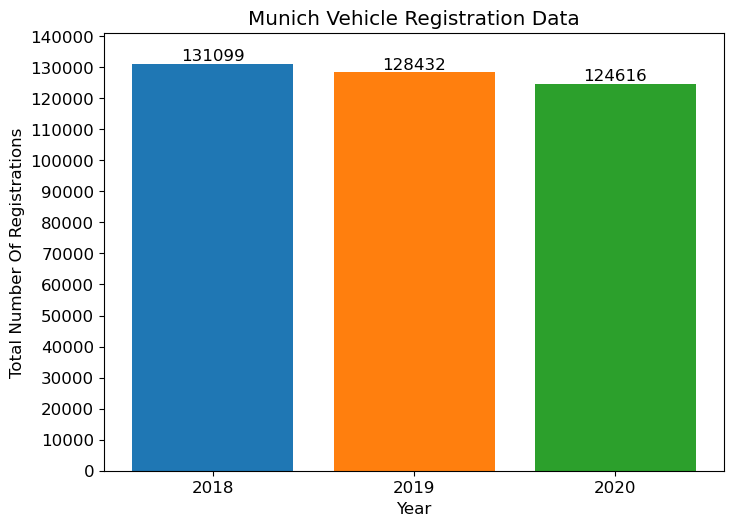

In [198]:
import numpy as np
import matplotlib.pyplot as plt

# Make a dataset
height = [int(mvr_df.take([0]).altogether), int(mvr_df.take([1]).altogether), int(mvr_df.take([2]).altogether)]

bars = ('2018', '2019', '2020')
y_pos = np.arange(len(bars))

# Define bar colors for different years
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

# Create bars with different colors
plt.bar(y_pos, height, color=colors)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Total Number Of Registrations')
plt.title('Munich Vehicle Registration Data')

# Set y-axis limits and tick positions
plt.ylim(0, max(height) + 10000)
plt.yticks(np.arange(0, max(height) + 10000, 10000))

# Add data labels to the bars
for i, v in enumerate(height):
    plt.text(i, v + 1000, str(v), color='black', ha='center')

# Customize the plot appearance
plt.rcParams['figure.figsize'] = [8, 6]  # Set the figure size
plt.rcParams['font.size'] = 12  # Set the font size

# Increase spacing between y-values
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()


### 6.2 Munich Bike Sharing Data Visualization 
It is to be noted that the time attribute value was scaled so as to draw a meaningful comparison with the Vehicle Registration data. 

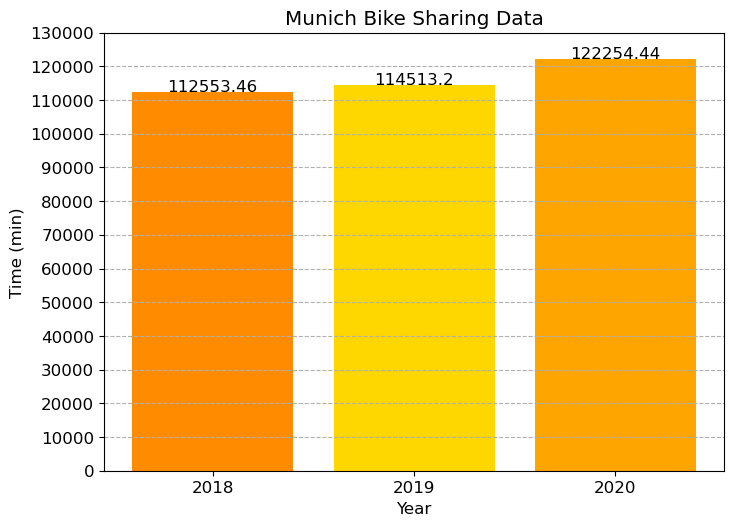

In [204]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset
height = [years[0], years[1], years[2]]

bars = ('2018', '2019', '2020')
y_pos = np.arange(len(bars))

# Define custom colors for the bars
colors = ['#FF8C00', '#FFD700', '#FFA500']

# Create bars with custom colors
plt.bar(y_pos, height, color=colors)

# Set y-axis limits and tick positions
plt.ylim(0, max(height) + 5000)
plt.yticks(np.arange(0, max(height) + 10000, 10000))

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Time (min)')
plt.title('Munich Bike Sharing Data')

# Add grid lines
plt.grid(axis='y', linestyle='--')

# Add data labels to the bars
for i, v in enumerate(height):
    plt.text(i, v + 100, str(v), color='black', ha='center')

# Customize the plot appearance
plt.rcParams['figure.figsize'] = [8, 6]  # Set the figure size
plt.rcParams['font.size'] = 12  # Set the font size

# Increase spacing between y-values
plt.subplots_adjust(bottom=0.15)

# Show the plot
plt.show()


## 7. Results

The two data sets were cleaned, transformed, and then visualized to find the relation between two data sets. The following bar charts was used to compare the values we found during previous steps. 

C:\Users\aleem\AppData\Local\Temp\ipykernel_9632\2971946677.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  baarcharData = comparison.pivot("column", "group", "val")


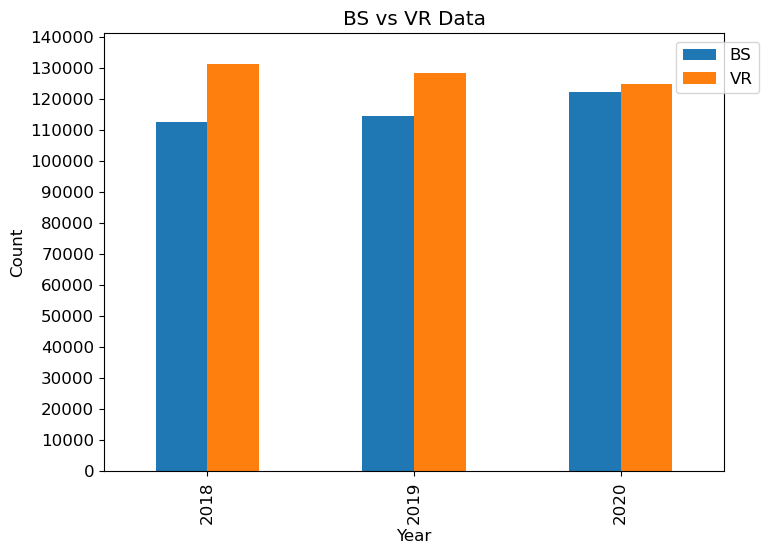

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

comparison = pd.DataFrame([
    ['VR', "2018", int(mvr_df.take([0]).altogether)],
    ['VR', '2019', int(mvr_df.take([1]).altogether)],
    ['VR', '2020', int(mvr_df.take([2]).altogether)],
    ['BS', '2018', years[0]],
    ['BS', '2019', years[1]],
    ['BS', '2020', years[2]]
], columns=['group', 'column', 'val'])

baarcharData = comparison.pivot("column", "group", "val")
baarcharData.plot(kind='bar')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('BS vs VR Data')

# Set y-axis limits and tick positions
plt.ylim(0, baarcharData.max().max() + 10000)
plt.yticks(np.arange(0, baarcharData.max().max() + 10000, 10000))

# Customize the plot appearance
plt.rcParams['figure.figsize'] = [8, 6]  # Set the figure size
plt.rcParams['font.size'] = 12  # Set the font size

# Increase spacing between y-values
plt.subplots_adjust(bottom=0.15)

# Show the plot with legend on the top right corner
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.07, 1))

# Show the plot
plt.show()


### Line Plot 
Since, from the bar plot shown above it can be seen that there is some relation between the number of vehicles registered in munich and time spent using a bike sharing service. To make it more clear, we can plot a line graph as shown below. 

C:\Users\aleem\AppData\Local\Temp\ipykernel_9632\1801618119.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  lineChartData = comparison.pivot("column", "group", "val")


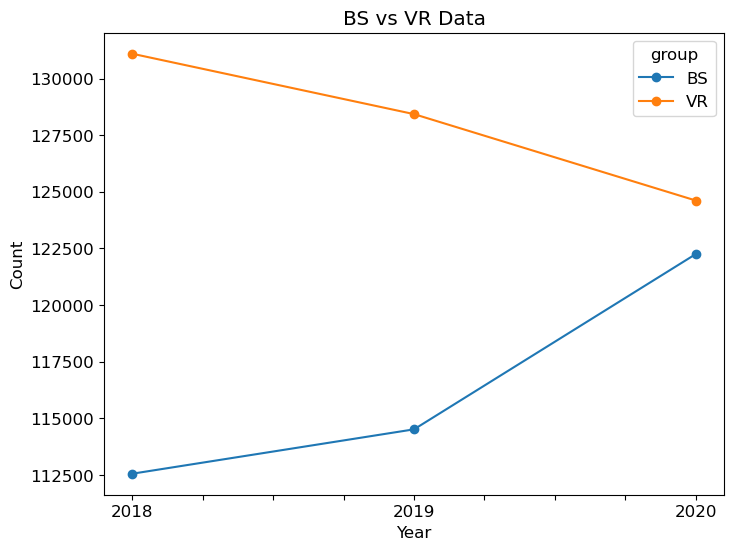

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

comparison = pd.DataFrame([
    ['VR', "2018", int(mvr_df.take([0]).altogether)],
    ['VR', '2019', int(mvr_df.take([1]).altogether)],
    ['VR', '2020', int(mvr_df.take([2]).altogether)],
    ['BS', '2018', years[0]],
    ['BS', '2019', years[1]],
    ['BS', '2020', years[2]]
], columns=['group', 'column', 'val'])

lineChartData = comparison.pivot("column", "group", "val")

# Create line plot
lineChartData.plot(kind='line', marker='o')

# Set axis labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('BS vs VR Data')

# Customize the plot appearance
plt.rcParams['figure.figsize'] = [8, 6]  # Set the figure size
plt.rcParams['font.size'] = 12  # Set the font size

# Show the plot
plt.show()


# 8. Conclusion

By analyzing the data and trends of bike sharing usage and vehicle registrations, we can determine there is a noticeable impact of bike sharing on the number of cars registered in Munich. It is important to note that this analysis does not consider other factors such as population growth, environmental effects, and vehicle types. However, with the inclusion of these factors, we can make more comprehensive conclusions.

The initial findings suggest that as bike sharing services have been introduced in Munich, there appears to be a decrease in the number of vehicle registrations each year. This trend is encouraging for both companies providing bike sharing services and the government. It implies that the population may be increasingly inclined towards utilizing bike sharing for their day-to-day commuting needs instead of purchasing new cars.

Based on these preliminary findings, it can be inferred that by introducing more bike sharing services and supporting infrastructure, the government can potentially further reduce the number of vehicles on the road, alleviate traffic congestion, and contribute to a more sustainable environment. However, further analysis considering additional factors and a more comprehensive study would be required to draw definitive conclusions and make informed policy decisions regarding bike sharing and its impact on vehicle registrations in Munich.